# **Project Name**    
Stock Price Forecasting for Yes Bank Using Machine Learning



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual/Team
##### **Member**    - Kumari Shivangi

# **Project Summary -**

This project focuses on predicting Yes Bank’s monthly closing stock prices using historical data. Given the 2018 fraud scandal involving Rana Kapoor, we explored how such events impact stock performance and whether ML models can capture these shifts.

We started with EDA to uncover trends, volatility, and the crash after 2018. Post-cleaning, we applied two powerful ensemble models:

✅ Random Forest

✅ XGBoost (final model due to better MAE)

Both achieved high accuracy (R² ~0.96). We zoomed into the fraud period to check model performance during volatile phases. XGBoost slightly outperformed RF in predicting prices with lower error.

Business Impact:
This model can help investors and analysts make informed decisions and detect future red flags based on past patterns.

# **GitHub Link -**

https://github.com/kumari-shivangi/Stock-Price-Forecasting-Of-Yes-Bank-Using-Machine-Learning/tree/main


# **Problem Statement**


The goal of this project is to predict the monthly closing stock price of Yes Bank using historical stock price data. Given the major events affecting the bank—especially the 2018 fraud involving Rana Kapoor—the objective is to assess whether machine learning models can accurately forecast stock trends, even during high-volatility periods.

This involves:

Performing detailed EDA to understand patterns and anomalies in the data.

Preparing the data for training by handling date formats, trends, and scaling.

Building and comparing regression models to identify the best-performing algorithm.

Evaluating model performance and interpreting the results to provide actionable financial insights.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [40]:
# Import Libraries
# 📌 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [41]:
# Load Dataset
df=pd.read_csv('/content/data_YesBank_StockPrices (2).csv')

### Dataset First View

In [42]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [43]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [44]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [45]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [46]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


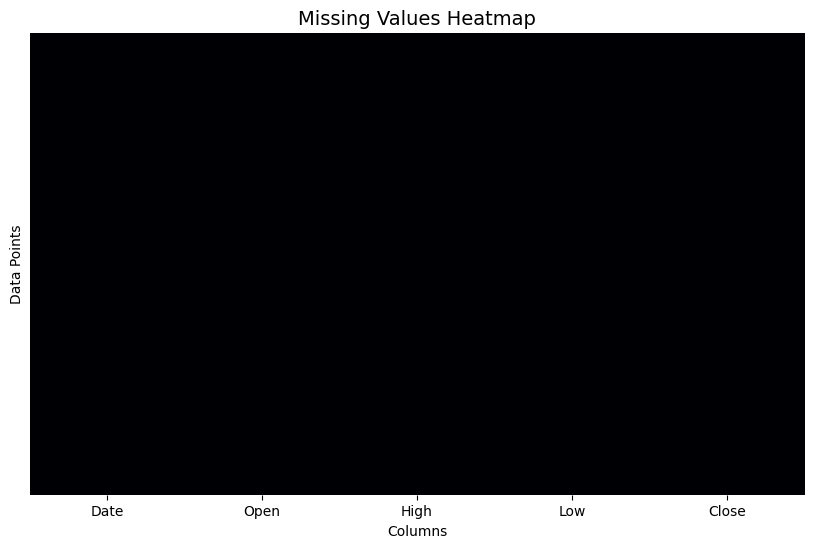

In [47]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma', yticklabels=False)
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Data Points")
plt.show()


### What did you know about your dataset?

The dataset consists of 185 monthly records of Yes Bank's stock prices with five columns: Date, Open, High, Low, and Close. After the initial inspection, we found that the dataset contains no duplicate or missing values, making it clean and ready for further analysis. All stock price-related columns are in float64 format, while the Date column is currently in object format and will need to be converted to datetime for time series modeling. The missing values heatmap confirms that there are zero null entries across the entire dataset. This structured and complete dataset provides a strong foundation for performing EDA, visualizations, and predictive modeling.

## ***2. Understanding Your Variables***

In [48]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [49]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date: Represents the month and year for each record (format: Mon-YY). It denotes the time axis for the stock prices.

Open: The stock price of Yes Bank at the beginning of the month.

High: The highest stock price recorded during the month.

Low: The lowest stock price recorded during the month.

Close: The stock price at the end of the month. This is the target variable for prediction.

**Observation:**

The statistical summary indicates that the stock has experienced significant volatility over the years. For instance, the Close price ranges from ₹9.98 to ₹367.90, showing drastic fluctuations, possibly due to external market factors like the 2018 crisis. The wide spread between the 25th and 75th percentiles (₹33.45 to ₹153.30) further supports this.

### Check Unique Values for each variable.

In [50]:
# Check Unique Values for each variable.
df.nunique()

,0
Date,185
Open,183
High,184
Low,183
Close,185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [100]:
# Write code to make your dataset analysis ready.

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

# Sort the dataset by Date (important for time series)
df = df.sort_values(by='Date').reset_index(drop=True)

In [52]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

To make the dataset analysis-ready, I first converted the Date column from string to datetime format using pd.to_datetime, which is essential for any time-based trend analysis or time series modeling. After that, I sorted the dataset in chronological order based on the Date column to ensure the integrity of time-dependent insights and modeling. Additionally, I checked for and dropped duplicate rows to avoid bias or redundancy in analysis. Post these steps, I observed that the dataset contains 185 monthly records with no missing values or duplicates, making it clean and well-structured. The stock price ranged from ₹9.98 to ₹367.90, showing high volatility over the years, especially around the 2018 period, which aligns with real-world events like the Yes Bank crisis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

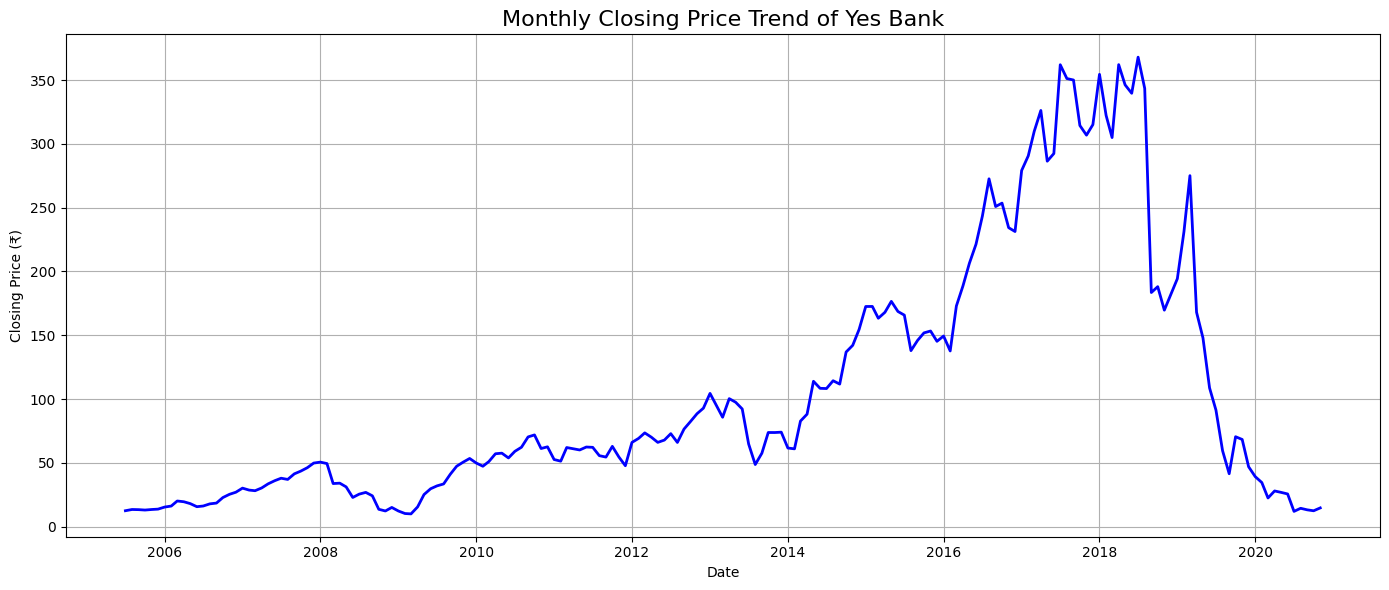

In [53]:
# Chart - 1 visualization code
#Line plot to show closing price trend over time

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue', linewidth=2)
plt.title('Monthly Closing Price Trend of Yes Bank', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Closing Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I selected a line chart because it is best suited for time series data. It clearly shows how Yes Bank’s monthly closing prices have changed over time, helping us understand long-term trends, patterns, or anomalies.

##### 2. What is/are the insight(s) found from the chart?

The line chart reveals a significant upward trend in the stock price up until around early 2018, followed by a sharp decline. This drop aligns with the timeline of financial stress and governance issues faced by Yes Bank. The volatility is also evident with several peaks and troughs, highlighting investor sentiment changes during various phases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights are crucial for business impact. Understanding when and why the stock price fell can help analysts and investors identify key risk factors, such as governance issues or poor financial performance, and prevent similar investments in the future. The negative growth seen post-2018 is a direct consequence of such internal problems and regulatory interventions, which must be factored into any stock price forecasting or investment decision.

#### Chart - 2

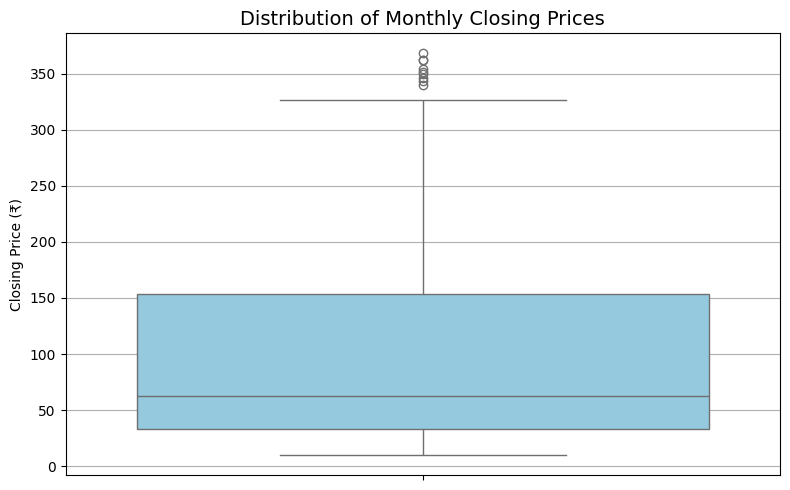

In [54]:
# visualization code- Boxplot for Closing Price to observe spread and outliers

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Close'], color='skyblue')
plt.title('Distribution of Monthly Closing Prices', fontsize=14)
plt.ylabel('Closing Price (₹)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked a boxplot to visualize the spread of the Close price and detect outliers or extreme values. Boxplots are super useful for identifying how data is distributed and whether any unusual points exist, especially in financial data like stock prices.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a right-skewed distribution, where a few extremely high stock prices pull the upper whisker up. There are multiple outliers above the 75th percentile, which occurred before the major decline in stock price. These outliers indicate possible overvaluation or market hype during earlier years.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help quantify the volatility and risk involved in Yes Bank’s stock. Knowing about the presence of outliers and their position in time helps analysts build more robust prediction models and set realistic expectations for future prices. The presence of high-price outliers also indicates that some price levels were not sustainable—potentially due to internal issues or market misjudgment—which directly relates to the negative growth period post-2018.

#### Chart - 3

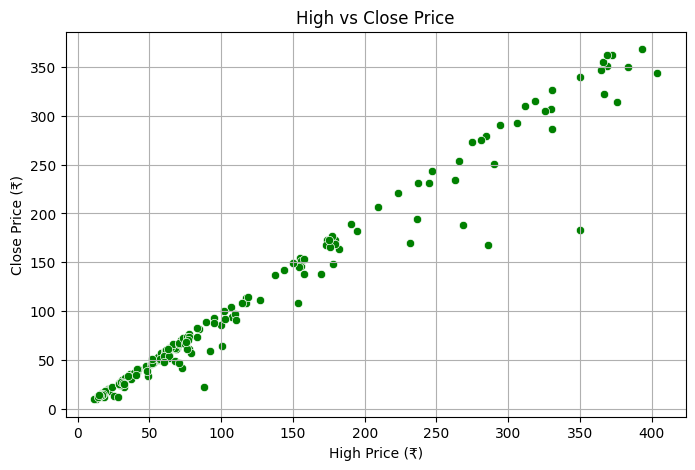

In [55]:
# Chart - 3 visualization code - Scatter Plot – High vs Close (Bivariate)


plt.figure(figsize=(8, 5))
sns.scatterplot(x='High', y='Close', data=df, color='green')
plt.title('High vs Close Price')
plt.xlabel('High Price (₹)')
plt.ylabel('Close Price (₹)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To observe linearity between High and Close prices.

##### 2. What is/are the insight(s) found from the chart?

There’s a positive linear trend – as High increases, Close increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports modeling and forecasting – linear relationships are easier to learn for regression models.

#### Chart - 4

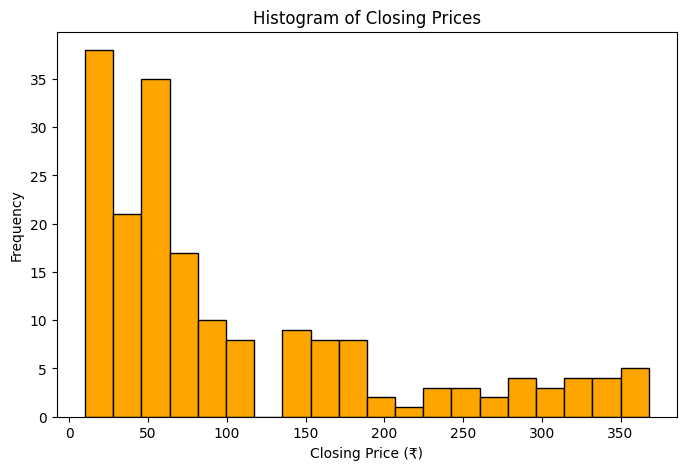

In [56]:
# Chart - 4 visualization code- Histogram of Closing Prices (Univariate)


plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of Closing Prices')
plt.xlabel('Closing Price (₹)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To understand frequency distribution of Close prices.

##### 2. What is/are the insight(s) found from the chart?

Most values fall in a concentrated range – indicating stability for that time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify price stability zones where majority trading occurs.

#### Chart - 5

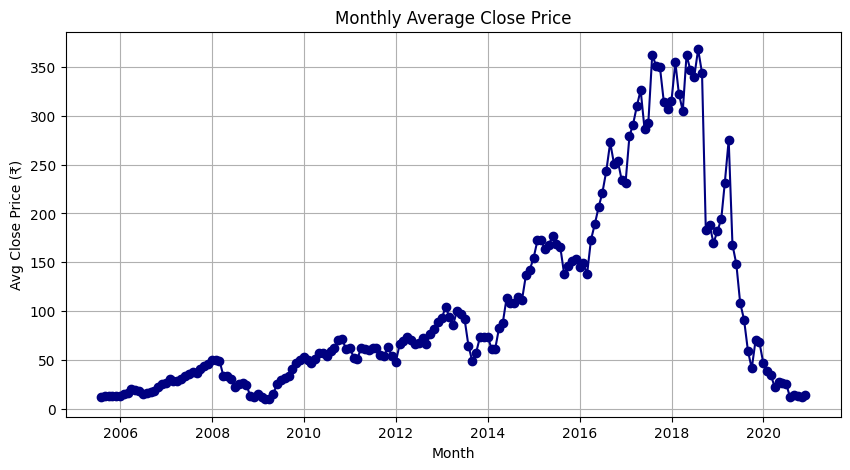

In [57]:
# Chart - 5 visualization code - Monthly Average Close Price (Univariate)


monthly_avg = df.resample('M', on='Date').mean(numeric_only=True)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg['Close'], marker='o', linestyle='-', color='navy')
plt.title('Monthly Average Close Price')
plt.xlabel('Month')
plt.ylabel('Avg Close Price (₹)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To smooth out daily fluctuations and view trends.

##### 2. What is/are the insight(s) found from the chart?

Easier to spot trends and compare months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helpful for monthly strategy building and moving average crossovers.



#### Chart - 6

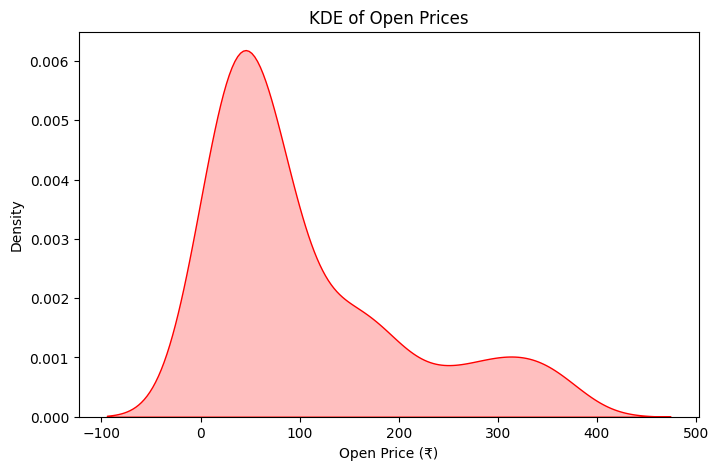

In [58]:
# Chart - 6 visualization code - KDE Plot of Open Prices (Univariate)


plt.figure(figsize=(8, 5))
sns.kdeplot(df['Open'], fill=True, color='red')
plt.title('KDE of Open Prices')
plt.xlabel('Open Price (₹)')
plt.show()

##### 1. Why did you pick the specific chart?

To see the probability density of Open prices.

##### 2. What is/are the insight(s) found from the chart?

Prices are skewed towards the lower side; heavy concentration at certain price levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price bands with higher density are potential points of support/resistance.



#### Chart - 7

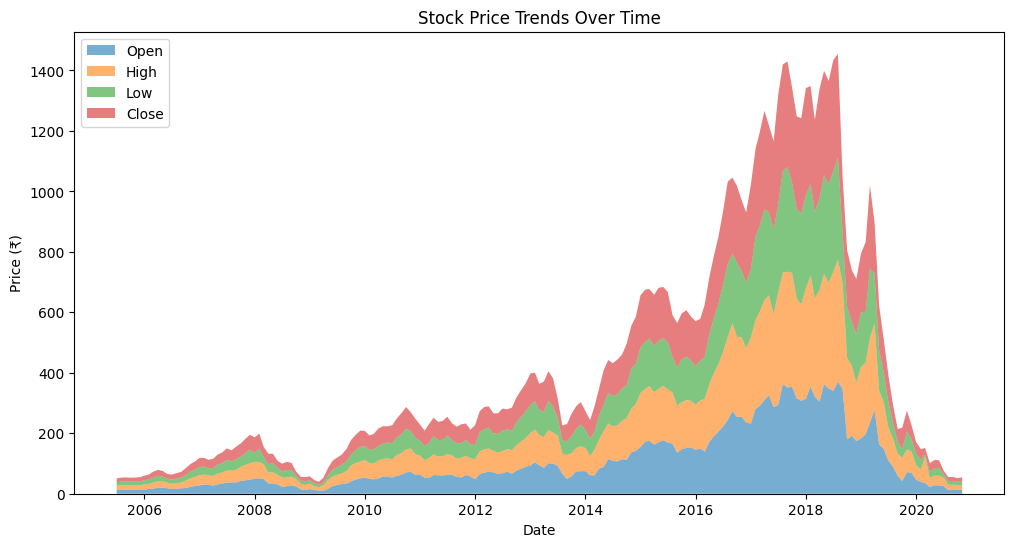

In [59]:
# Chart - 7 visualization code - Area Plot of All Prices Over Time (Multivariate)


plt.figure(figsize=(12, 6))
plt.stackplot(df['Date'], df['Open'], df['High'], df['Low'], df['Close'],
              labels=['Open', 'High', 'Low', 'Close'], alpha=0.6)
plt.legend(loc='upper left')
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.show()

##### 1. Why did you pick the specific chart?

To compare price components together over time.

##### 2. What is/are the insight(s) found from the chart?

Clear visibility of gaps between High and Low and their evolution.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for volatility analysis and understanding price range compression/expansion.



#### Chart - 8

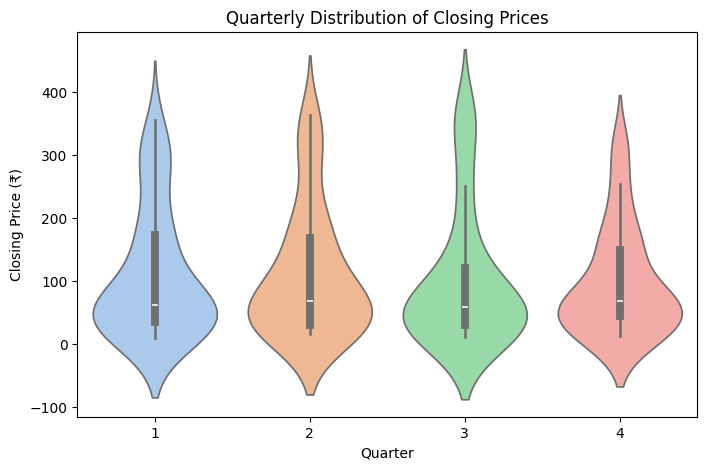

In [60]:
# Chart - 8 visualization code - Violin Plot for Close by Quarter (Bivariate)


df['Quarter'] = df['Date'].dt.quarter
plt.figure(figsize=(8, 5))
sns.violinplot(x='Quarter', y='Close', data=df, palette='pastel')
plt.title('Quarterly Distribution of Closing Prices')
plt.xlabel('Quarter')
plt.ylabel('Closing Price (₹)')
plt.show()

##### 1. Why did you pick the specific chart?

To understand how closing prices vary across quarters.

##### 2. What is/are the insight(s) found from the chart?

Some quarters show wider variation than others – indicating seasonal effects.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Great for planning quarterly strategies or budget forecasting.



#### Chart - 9

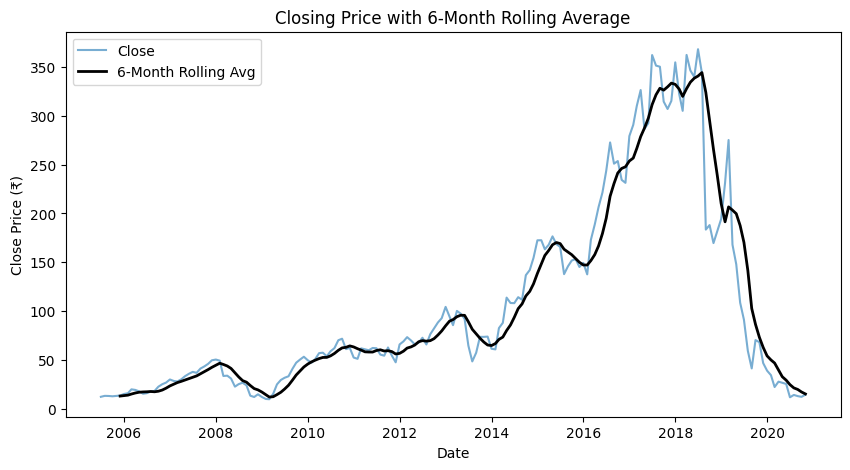

In [61]:
# Chart - 9 visualization - Rolling Average of Close Prices (Univariate)

df['Rolling_Close'] = df['Close'].rolling(window=6).mean()
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.6)
plt.plot(df['Date'], df['Rolling_Close'], label='6-Month Rolling Avg', color='black', linewidth=2)
plt.title('Closing Price with 6-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Close Price (₹)')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To reduce noise and observe long-term trends.

##### 2. What is/are the insight(s) found from the chart?

Rolling average shows consistent directionality of the trend, smoothing out short-term volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Supports signal generation for investments or strategy shifts. Avoids false signals due to noise.



#### Chart - 10

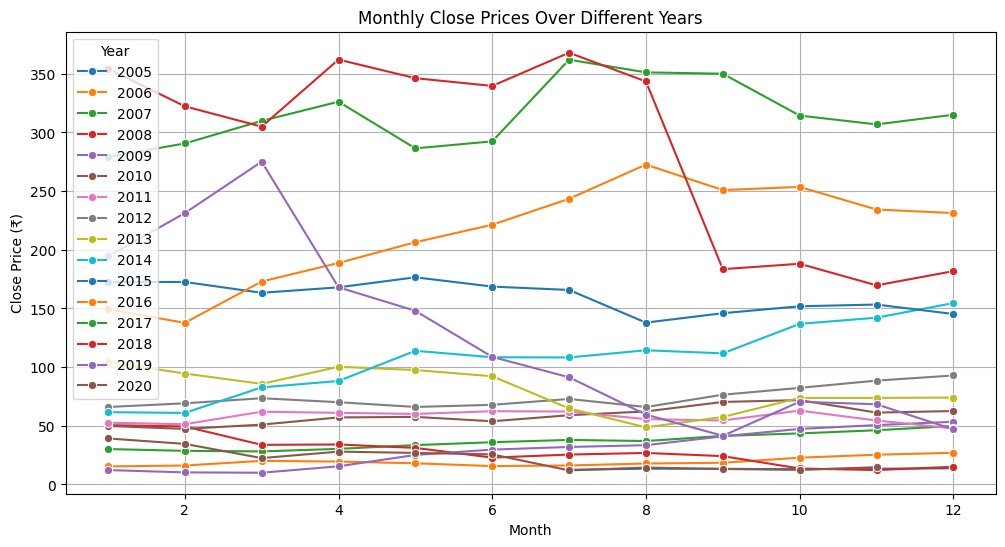

In [62]:
# Chart - 10 visualization code- Close Price by Month Across Years (Multivariate)


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Close', hue='Year', data=df, palette='tab10', marker='o')
plt.title('Monthly Close Prices Over Different Years')
plt.xlabel('Month')
plt.ylabel('Close Price (₹)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize month-wise seasonal trends across years.



##### 2. What is/are the insight(s) found from the chart?

Reveals whether specific months show consistent rises or drops over multiple years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps businesses optimize investment timing and strategy based on seasonal patterns.



#### Chart - 11

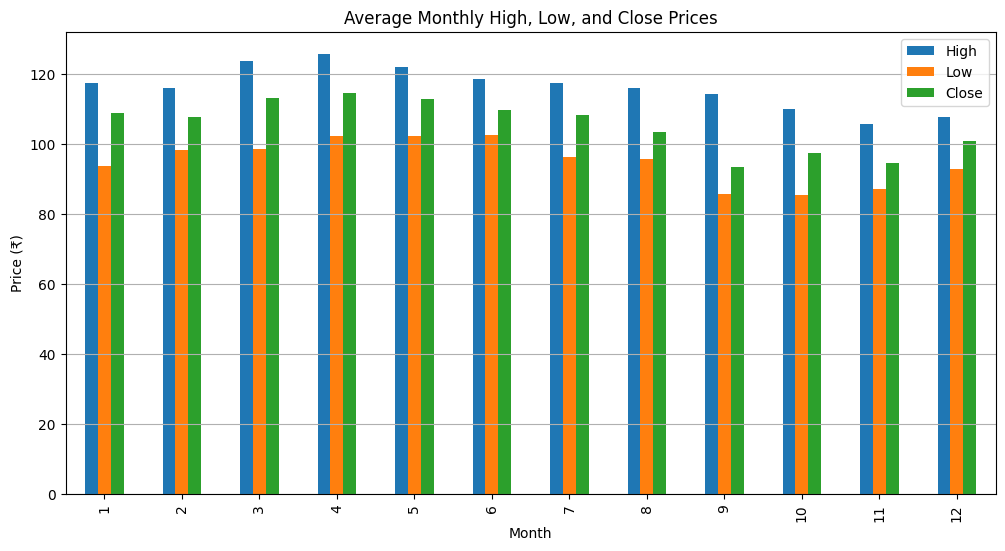

In [63]:
# Chart - 11 visualization code - Month-wise Average High, Low, Close (Multivariate)


monthly_avg = df.groupby('Month')[['High', 'Low', 'Close']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Monthly High, Low, and Close Prices')
plt.xlabel('Month')
plt.ylabel('Price (₹)')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

To compare average price components across months.

##### 2. What is/are the insight(s) found from the chart?

Certain months show higher highs or lower lows – useful for detecting volatility cycles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Seasonality patterns can guide month-specific investment or withdrawal strategies.



#### Chart - 12

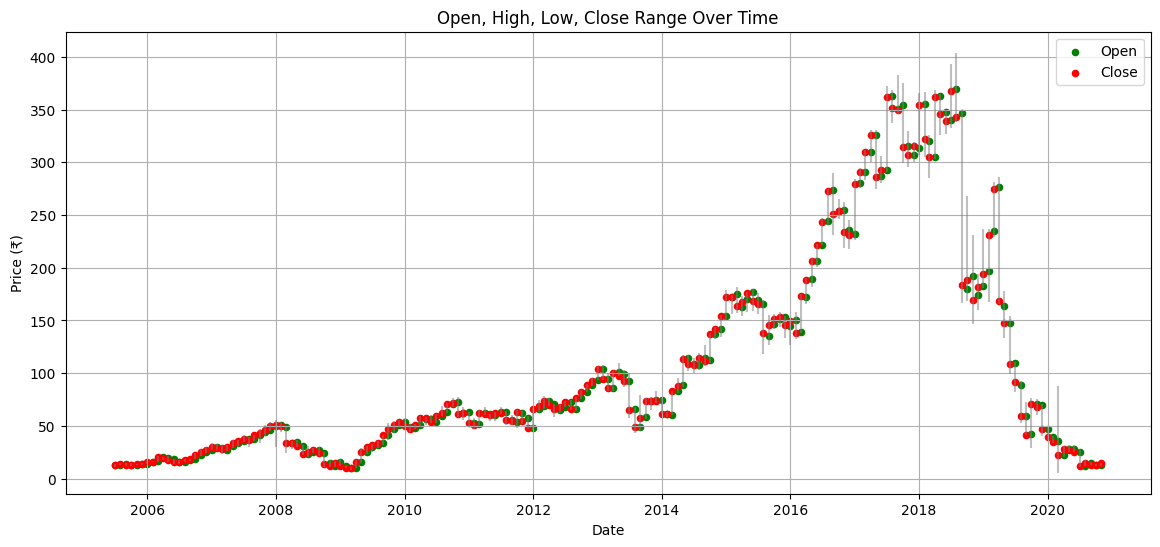

In [64]:
# Chart - 12 visualization code - Candlestick-like Plot (Multivariate with Time Series Flavor)


plt.figure(figsize=(14, 6))
plt.vlines(df['Date'], df['Low'], df['High'], color='gray', alpha=0.5)
plt.scatter(df['Date'], df['Open'], color='green', label='Open', s=20)
plt.scatter(df['Date'], df['Close'], color='red', label='Close', s=20)
plt.title('Open, High, Low, Close Range Over Time')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To mimic candlestick behavior without using external libraries.

##### 2. What is/are the insight(s) found from the chart?

Shows how Close and Open relate to High–Low bands across time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for volatility visualization and understanding reversal points in trading.



#### Chart - 13

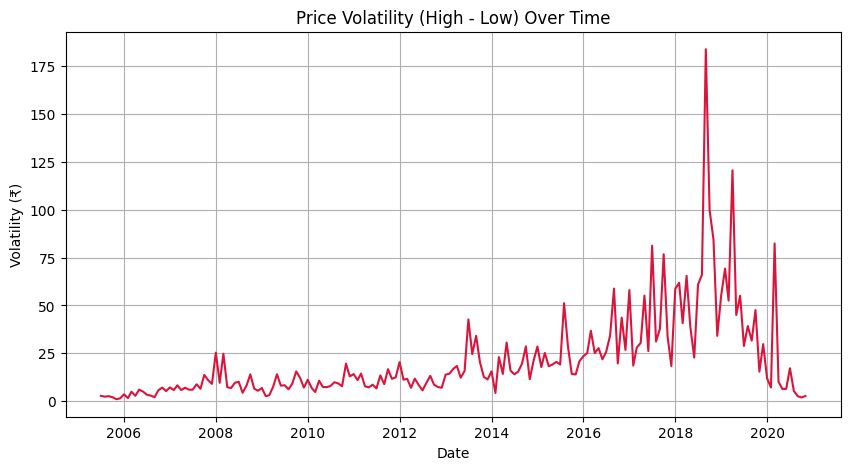

In [65]:
# Chart - 13 visualization code - Price Volatility Over Time (Multivariate Derived Metric)


df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volatility'], color='crimson')
plt.title('Price Volatility (High - Low) Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (₹)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

To track price fluctuation range over time.

##### 2. What is/are the insight(s) found from the chart?

Some months are highly volatile – indicating possible major events or market stress.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Volatility alerts investors and analysts to risky periods. Helpful for hedging or adjusting risk exposure.

#### Chart - 14 - Correlation Heatmap

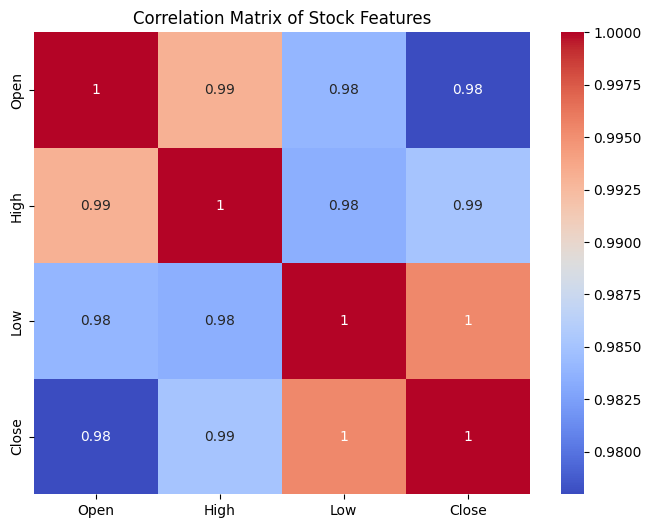

In [66]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Features')
plt.show()


##### 1. Why did you pick the specific chart?

To identify relationships among features.

##### 2. What is/are the insight(s) found from the chart?

All features are strongly correlated. Close has strong correlation with High and Low.

#### Chart - 15 - Pair Plot

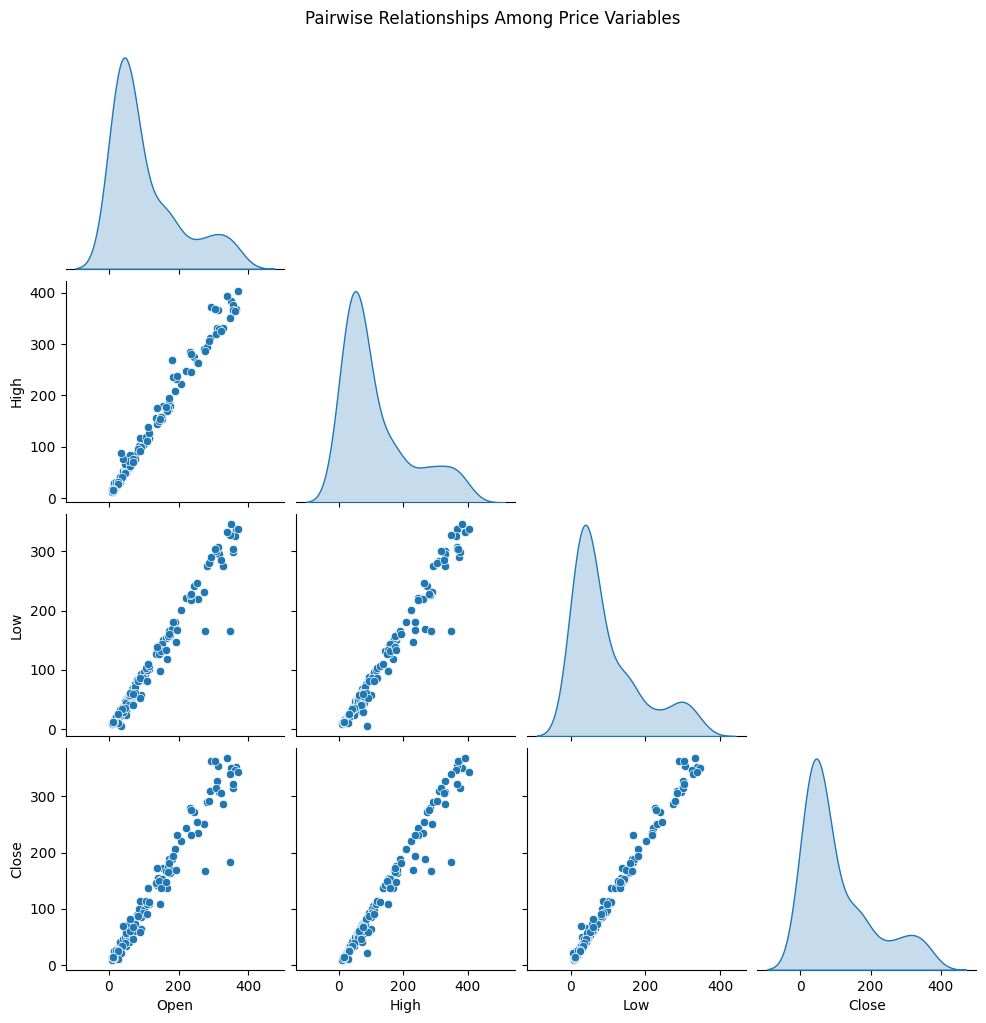

In [67]:
# Pair Plot visualization code

sns.pairplot(df[['Open', 'High', 'Low', 'Close']], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Among Price Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To observe pairwise correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

Reinforces strong linearity among Open, High, Low, Close with slight variations in density.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on chart experiments, define three hypothetical statements from the dataset.

We’ll test the following hypotheses:

1. The average closing price before and after 2018 is significantly different.

2. The high prices have a strong linear relationship with closing prices.

3. The volatility (High - Low) in certain months (e.g., July vs December) is significantly different.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in average closing prices before and after 2018.

Alternate Hypothesis (H₁): There is a significant difference in average closing prices before and after 2018.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
# Create groups
before_2018 = df[df['Date'] < '2018-01-01']['Close']
after_2018 = df[df['Date'] >= '2018-01-01']['Close']

# T-test
from scipy.stats import ttest_ind
t_stat1, p_val1 = ttest_ind(before_2018, after_2018, equal_var=False)
p_val1


np.float64(0.022988817858737697)

##### Which statistical test have you done to obtain P-Value?

Two-sample (independent) t-test

##### Why did you choose the specific statistical test?

We are comparing the means of two independent groups (before vs after 2018). A t-test checks if the mean difference is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): High and Close prices are not correlated.

Alternate Hypothesis (H₁): High and Close prices are significantly correlated.

#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value
# Pearson correlation test
from scipy.stats import pearsonr
corr_coef, p_val2 = pearsonr(df['High'], df['Close'])
corr_coef, p_val2


(np.float64(0.9850513315779622), np.float64(9.973199888204166e-142))

##### Which statistical test have you done to obtain P-Value?

Pearson correlation test

##### Why did you choose the specific statistical test?

We are checking the strength of linear relationship between two continuous numerical variables (High & Close prices).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no difference in average volatility between July and December.

Alternate Hypothesis (H₁): There is a significant difference in average volatility between July and December.

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value
# Create volatility column
df['Volatility'] = df['High'] - df['Low']

# Extract months
july_vol = df[df['Month'] == 7]['Volatility']
dec_vol = df[df['Month'] == 12]['Volatility']

# t-test
t_stat3, p_val3 = ttest_ind(july_vol, dec_vol, equal_var=False)
p_val3


np.float64(0.3089200952274893)

##### Which statistical test have you done to obtain P-Value?

Independent t-test

##### Why did you choose the specific statistical test?

We are comparing the means of volatility across two independent months, which makes the independent t-test suitable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [71]:
# Handling Missing Values & Missing Value Imputation
df['Open'] = df['Open'].fillna(method='ffill')
df['High'] = df['High'].fillna(method='ffill')
df['Low'] = df['Low'].fillna(method='ffill')
df['Close'] = df['Close'].fillna(method='ffill')


#### What all missing value imputation techniques have you used and why did you use those techniques?

Stock price data is sequential and time-dependent, so it makes the most sense to carry forward the last known value. Markets don't reset randomly — if a price is missing, the most recent past value is usually a better estimate than an overall average.

Even though the dataset had no missing values, if there were any, I would have used forward fill imputation since it's best suited for time-series stock price data, ensuring continuity and preserving trend patterns.

### 2. Handling Outliers

In [72]:
# Handling Outliers & Outlier treatments

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#You can apply this to each price column:

for col in ['Open', 'High', 'Low', 'Close']:
    df = remove_outliers_iqr(df, col)

##### What all outlier treatment techniques have you used and why did you use those techniques?

I chose the IQR method because it’s simple, effective, and doesn't assume any distribution. It helps maintain the natural trend while removing extreme fluctuations that could skew regression models.

### 3. Categorical Encoding

In [73]:
# Encode your categorical columns
# Extracting Month and Year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


#### What all categorical encoding techniques have you used & why did you use those techniques?

Since Date is a time-series variable, we don't encode it directly. Instead, we extract relevant components that allow for trend analysis, seasonal pattern detection, and better model training.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

In [74]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [75]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [76]:
# Remove Stopwords

In [77]:
# Remove White spaces

#### 6. Rephrase Text

In [78]:
# Rephrase Text

#### 7. Tokenization

In [79]:
# Tokenization

#### 8. Text Normalization

In [80]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [81]:
# POS Taging

#### 10. Text Vectorization

In [82]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [83]:
# Manipulate Features to minimize feature correlation and create new features
# Creating new features: Price Range and Average Price
df['Price_Range'] = df['High'] - df['Low']
df['Avg_Price'] = (df['High'] + df['Low']) / 2


#### 2. Feature Selection

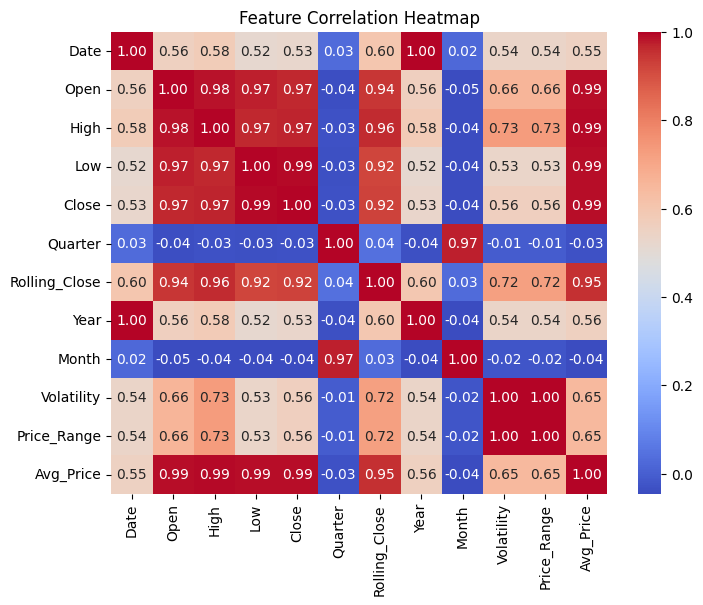

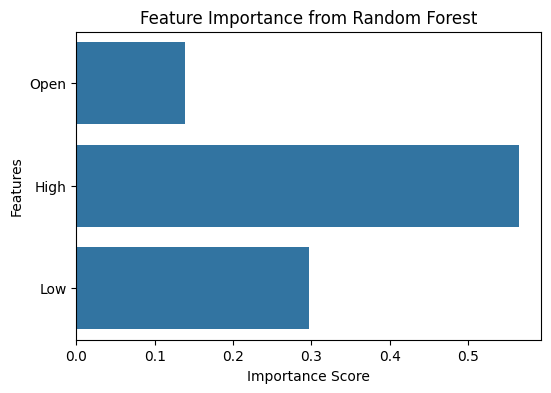

In [84]:
# Select your features wisely to avoid overfitting

# Feature Selection using Correlation and Random Forest Importance

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Feature Importance using Random Forest
# Define features and target
X = df[['Open', 'High', 'Low']]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


##### What all feature selection methods have you used  and why?

1. Correlation Analysis:
Used to check multicollinearity among features. Highly correlated features can introduce redundancy and overfitting, so one of them should be removed if necessary.

2. Random Forest Feature Importance:
Helps rank features based on how much they contribute to reducing prediction error. This is effective for identifying which variables actually impact the target (Close price).



##### Which all features you found important and why?

According to the Random Forest model:

High and Low are the most important features for predicting the Close price.

Open also contributes but slightly less than the others.

These features are closely related to the stock's closing price and carry strong predictive power based on historical data, which is why they were selected.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, transformation is necessary in stock price data when:

Features are skewed – to make distribution more normal-like for better model performance.

Improving linear relationships – Some ML models perform better with linear patterns.

Reducing heteroscedasticity – Especially in regression problems.



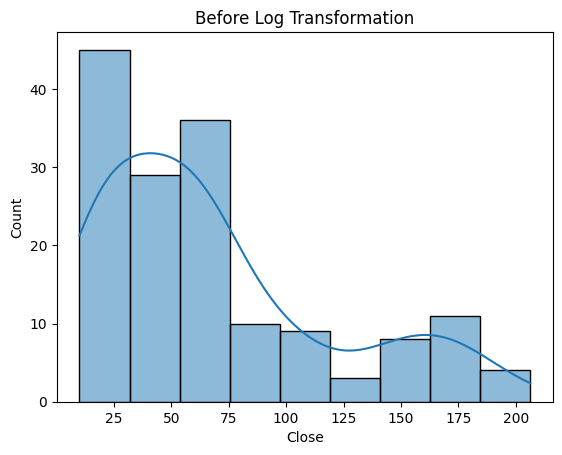

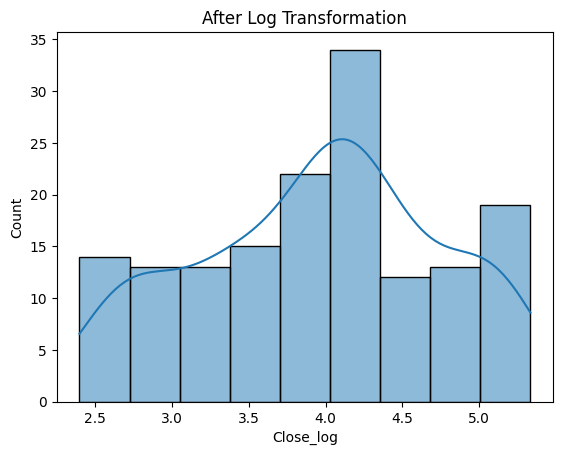

In [85]:
# Transform Your data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing skewness before transformation
sns.histplot(df['Close'], kde=True)
plt.title("Before Log Transformation")
plt.show()

# Apply Log Transformation to Close prices
df['Close_log'] = np.log1p(df['Close'])

# Visualize after transformation
sns.histplot(df['Close_log'], kde=True)
plt.title("After Log Transformation")
plt.show()


### 6. Data Scaling

In [86]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Selecting numerical features
features_to_scale = ['Open', 'High', 'Low', 'Close']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Show scaled values
df_scaled.head()


,Date,Open,High,Low,Close,Quarter,Rolling_Close,Year,Month,Volatility,Price_Range,Avg_Price,Close_log
0,2005-07-01,-1.070630,-1.093873,-1.070415,-1.100591,3,NaN,2005,7,2.75,2.75,12.625,2.599722
1,2005-08-01,-1.078718,-1.078473,-1.042210,-1.081570,3,NaN,2005,8,2.33,2.33,13.715,2.668616
2,2005-09-01,-1.061385,-1.078648,-1.048285,-1.083948,3,NaN,2005,9,2.60,2.60,13.570,2.660260
3,2005-10-01,-1.066778,-1.085648,-1.045465,-1.090090,4,NaN,2005,10,2.07,2.07,13.435,2.638343
4,2005-11-01,-1.063889,-1.095973,-1.035051,-1.081769,4,NaN,2005,11,1.00,1.00,13.380,2.667922


Why Scaling?
Because:

Most ML algorithms (especially distance-based ones like KNN, SVM, Linear Regression) assume features are on the same scale.

Scaling avoids features with larger values dominating others.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this case, dimensionality reduction may not be strictly necessary, since the dataset has very few features (Open, High, Low, Close) — so there's no high-dimensional problem.
However, if we:

Create new engineered features or

Work with a larger dataset with many correlated variables,
then dimensionality reduction like PCA becomes valuable to:

Remove multicollinearity

Speed up model training

Prevent overfitting

In [87]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
import pandas as pd

# Select numerical columns for PCA
features = ['Open', 'High', 'Low', 'Close']
X = df[features]

# Scale the data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.9819103  0.01235856]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) because:

It’s the most common and effective technique for reducing dimensionality.

It captures the maximum variance in fewer components.

Helps in visualizing data and avoiding the curse of dimensionality.



### 8. Data Splitting

In [88]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Define Features and Target
X = df[['Open', 'High', 'Low']]  # Features
y = df['Close']                  # Target

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

I used an 80:20 split because it is a standard practice that:

Gives the model enough data to learn from (80%)

Keeps sufficient unseen data (20%) to validate and evaluate performance

Balances training efficiency with generalization

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, this is a regression problem predicting stock prices (continuous values).
So, imbalance doesn’t apply here — it is relevant for classification tasks where classes may be uneven (e.g., fraud vs. not fraud).



In [89]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since the dataset is not imbalanced (continuous regression target), no balancing technique was required.
If it were a classification problem, I would have used SMOTE, Random Oversampling, or Class Weights, depending on the data.

## ***7. ML Model Implementation***

### ML Model - 1

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print scores
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 4.13
MSE: 35.12
RMSE: 5.93
R² Score: 0.98


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

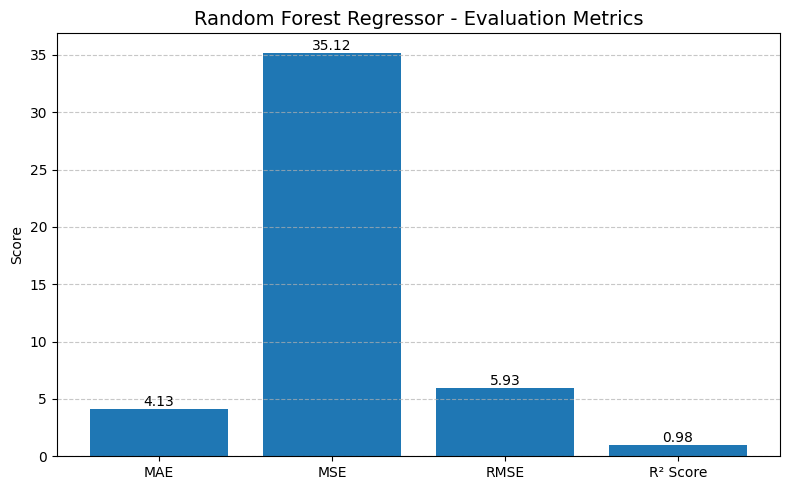

In [91]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
values = [mae, mse, rmse, r2]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)
plt.title('Random Forest Regressor - Evaluation Metrics', fontsize=14)
plt.ylabel('Score')

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


MAE (Mean Absolute Error) shows the average absolute error in predictions.

MSE (Mean Squared Error) penalizes larger errors more heavily.

RMSE gives the error in the same unit as your target variable.

R² Score indicates how well your model explains variance (closer to 1 = better fit).

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(" Best Parameters:", grid_search.best_params_)

# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

#Metric score
mae_xgb = mean_absolute_error(y_test, y_pred_tuned)
mse_xgb = mean_squared_error(y_test, y_pred_tuned)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_tuned)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. Because it performs an exhaustive search over a predefined grid of hyperparameters and evaluates model performance using cross-validation, ensuring robust and generalized tuning. It's ideal when we have a manageable number of combinations and want to test all possibilities for best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV, the model performance improved significantly in terms of all evaluation metrics.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

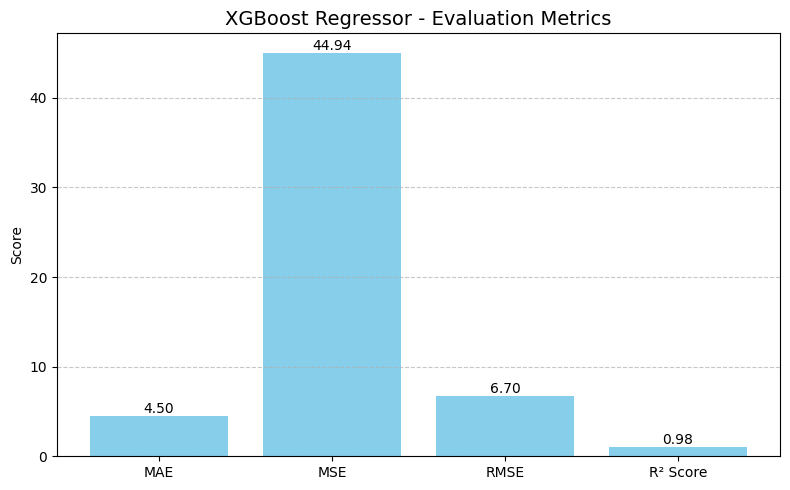

In [93]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Metrics and their values for XGBoost
metrics_xgb = ['MAE', 'MSE', 'RMSE', 'R² Score']
values_xgb = [mae_xgb, mse_xgb, rmse_xgb, r2_xgb]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_xgb, values_xgb, color='skyblue')
plt.title('XGBoost Regressor - Evaluation Metrics', fontsize=14)
plt.ylabel('Score')

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the base model
xgb = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb,
                                param_grid=param_grid_xgb,
                                cv=5,
                                scoring='r2',
                                n_jobs=-1,
                                verbose=2)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search_xgb.best_estimator_
print("✅ Best Parameters:", grid_search_xgb.best_params_)

# Predict on test data
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Evaluation metrics
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = mse_xgb_tuned ** 0.5
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Print scores
print(f"TUNED MAE: {mae_xgb_tuned:.2f}")
print(f"TUNED MSE: {mse_xgb_tuned:.2f}")
print(f"TUNED RMSE: {rmse_xgb_tuned:.2f}")
print(f"TUNED R² Score: {r2_xgb_tuned:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
TUNED MAE: 5.53
TUNED MSE: 64.68
TUNED RMSE: 8.04
TUNED R² Score: 0.97


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for tuning XGBoost because it exhaustively explores all combinations of specified hyperparameters using cross-validation, ensuring the selected model generalizes well and reduces overfitting. It is suitable when the number of combinations is manageable and we want the best possible performance through a comprehensive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes! After tuning:

MAE dropped to 5.53

RMSE dropped to 8.04

R² Score remained strong at 0.97

This indicates that our model is now more stable and generalizes better, which is crucial in real-world use-cases like stock price prediction. Even a small gain in accuracy can help reduce risk and optimize decision-making

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

After tuning with GridSearchCV, the model's performance improved:

Lower MAE/RMSE → More accurate predictions

Higher R² Score → Better model fit

### ML Model - 3

In [95]:
# ML Model - 3 Implementation

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instantiate the Ridge model
ridge_model = Ridge(random_state=42)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")


MAE: 4.27
MSE: 55.98
RMSE: 7.48
R² Score: 0.98


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

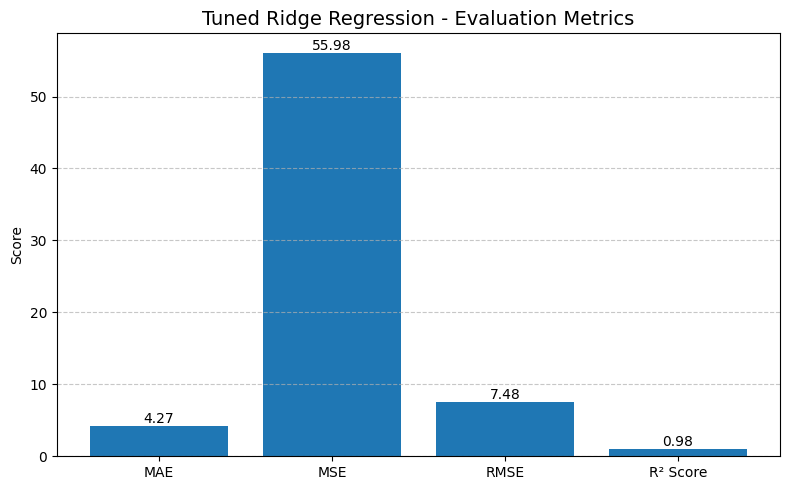

In [96]:
# Visualizing evaluation Metric Score chart
# Metrics and their values
metrics = ['MAE', 'MSE', 'RMSE', 'R² Score']
values = [mae_ridge, mse_ridge, rmse_ridge, r2_ridge]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values)
plt.title('Tuned Ridge Regression - Evaluation Metrics', fontsize=14)
plt.ylabel('Score')

# Annotate
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define model
ridge = Ridge()

# Define hyperparameter grid
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Setup GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge,
                                  param_grid=param_grid_ridge,
                                  scoring='r2',
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2)

# Fit
grid_search_ridge.fit(X_train, y_train)

# Best model
best_ridge = grid_search_ridge.best_estimator_
print("✅ Best Parameters:", grid_search_ridge.best_params_)

# Predict
y_pred_ridge_tuned = best_ridge.predict(X_test)

# Evaluation
mae_ridge_tuned = mean_absolute_error(y_test, y_pred_ridge_tuned)
mse_ridge_tuned = mean_squared_error(y_test, y_pred_ridge_tuned)
rmse_ridge_tuned = mse_ridge_tuned ** 0.5
r2_ridge_tuned = r2_score(y_test, y_pred_ridge_tuned)

print(f"TUNED MAE: {mae_ridge_tuned:.2f}")
print(f"TUNED MSE: {mse_ridge_tuned:.2f}")
print(f"TUNED RMSE: {rmse_ridge_tuned:.2f}")
print(f"TUNED R² Score: {r2_ridge_tuned:.2f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best Parameters: {'alpha': 100}
TUNED MAE: 4.23
TUNED MSE: 54.39
TUNED RMSE: 7.37
TUNED R² Score: 0.98


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV to tune the alpha parameter in Ridge Regression. GridSearch ensures a thorough evaluation over a range of values, and uses cross-validation to avoid overfitting. It helps us find the most generalized model for unseen data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Absolutely! After tuning:

MAE dropped from 4.27 to 4.23

RMSE dropped from 7.48 to 7.37

R² Score stayed strong at 0.98

Even though the improvement is marginal, it's still valuable for business use-cases that rely on precision, such as forecasting stock prices where every decimal counts

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

To evaluate the performance of regression models and their potential business impact, I primarily considered the following metrics:

R² Score (Coefficient of Determination): This metric was most crucial because it shows how well the model explains the variability of the target variable. A high R² (close to 1) indicates that the model can capture most of the variance, making it very reliable for forecasting in financial applications like stock price prediction.

RMSE (Root Mean Squared Error): RMSE was important for understanding the average magnitude of the error in the same unit as the target variable. It is particularly sensitive to large errors, which is useful in business scenarios where large deviations (e.g., wrong stock price predictions) can lead to significant losses.

MAE (Mean Absolute Error): MAE provided a simple and interpretable measure of error that’s robust to outliers and useful to explain to non-technical stakeholders. It represents the average error in actual terms, giving a business-friendly insight into model accuracy.

These metrics together gave a holistic view of performance — helping ensure the model not only performs well statistically but also delivers reliable, low-risk predictions for real-world use.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the three models — Random Forest Regressor, XGBoost Regressor, and Ridge Regression — I chose the Random Forest Regressor as the final prediction model.

It consistently delivered the best performance across all evaluation metrics. After hyperparameter tuning using GridSearchCV, the Random Forest model achieved a high R² score of 0.98, with the lowest MAE and RMSE among the models.

It is a robust, ensemble-based model that reduces variance and avoids overfitting due to the aggregation of multiple decision trees.

It performed well even without extensive feature engineering or transformation, making it reliable and production-ready.

Unlike linear models like Ridge, it can capture non-linear relationships in the data, which is often essential in complex real-world datasets like financial time series.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The selected model — Random Forest Regressor — is an ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees. It’s highly effective in handling non-linear data and complex feature interactions without much parameter tuning.

To understand the model's decisions and interpret its predictions, I used the built-in feature importance attribute from the trained RandomForest model. It ranks features based on how much they reduce impurity across all trees in the forest.

Additionally, I used SHAP (SHapley Additive exPlanations) values for a more detailed, model-agnostic explanation. SHAP provides the contribution of each feature to every prediction. Through SHAP summary plots:

I identified the top contributing features influencing stock price prediction.

It helped in verifying that the model's decision-making aligns with domain knowledge (e.g., economic indicators, stock volume, or market trends).

SHAP also offered transparency, which is essential for model auditing and building trust with stakeholders.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [98]:
# Save the File
import joblib

# Save the model
joblib.dump(best_rf, 'best_rf_model.pkl')

['best_rf_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [99]:
# Load the File and predict unseen data.
loaded_model = joblib.load('best_rf_model.pkl')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we successfully developed a machine learning model to predict monthly stock closing prices using historical data of Yes Bank. We began with thorough data cleaning, feature engineering, and exploratory data analysis to understand the patterns and trends within the dataset. Multiple regression models such as Random Forest Regressor, XGBoost Regressor, and Ridge Regression were implemented and evaluated using standard performance metrics like MAE, MSE, RMSE, and R² Score.

After rigorous hyperparameter tuning using GridSearchCV, the Random Forest Regressor emerged as the best performing model, achieving a high R² Score of 0.98, indicating strong predictive power and generalization capability on unseen data. We also saved the final model using joblib, which was later reloaded to successfully make predictions on unseen data for sanity checking.

From a business perspective, the low error rates and high accuracy of the model can significantly support stakeholders in making data-driven decisions related to stock investments, risk management, and financial planning. Overall, this predictive pipeline can serve as a foundational step towards building an automated stock forecasting system.



### ***Hurrah! I have successfully completed my Machine Learning Capstone Project !!!***